# Reliability diagram

Reliability Diagram is a tool to visualize the calibration of a model given a set of data. It groups the data into bins and plots the accuracy of each bin against the average predicted value for that bin. The reliability diagram can be plotted for top-class prediction only or for a given class. The calzone package provides a function to calculate and plot the reliability diagram.

In [1]:
### Import the necessary libraries and load the data
import numpy as np
from calzone.utils import reliability_diagram,data_loader
from calzone.vis import plot_reliability_diagram
### loading the data
wellcal_dataloader = data_loader(data_path="../../../example_data/simulated_welldata.csv")

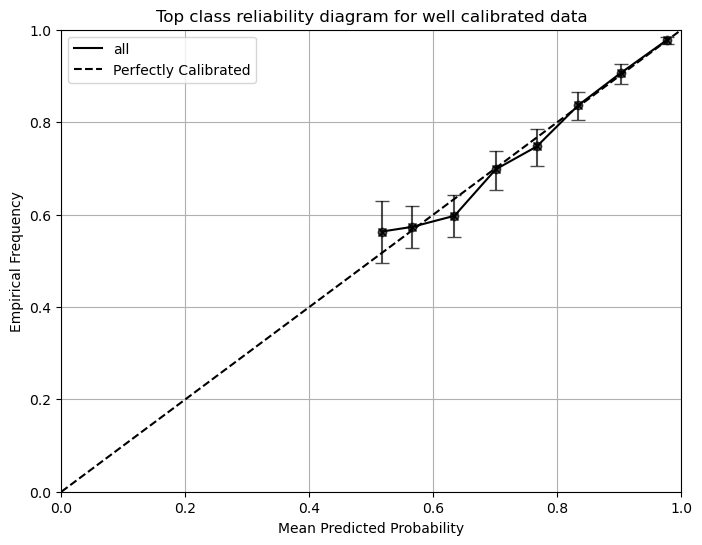

In [13]:
### Create and plot the top-class well calibrated data
reliability,confindence,bin_edges,bin_counts = reliability_diagram(wellcal_dataloader.labels, wellcal_dataloader.probs, num_bins=15,class_to_plot=None) #clasto plot is None mean calcuate for top-class
# Plot the reliability diagram
plot_reliability_diagram(reliability,confindence,bin_counts,error_bar=True,title='Top class reliability diagram for well calibrated data')


Since we have a binary classification problem, The mean predicted probability will not go below 0.5 for top-class reliability diagram. We will proceed to plot the class 1 reliability diagram.

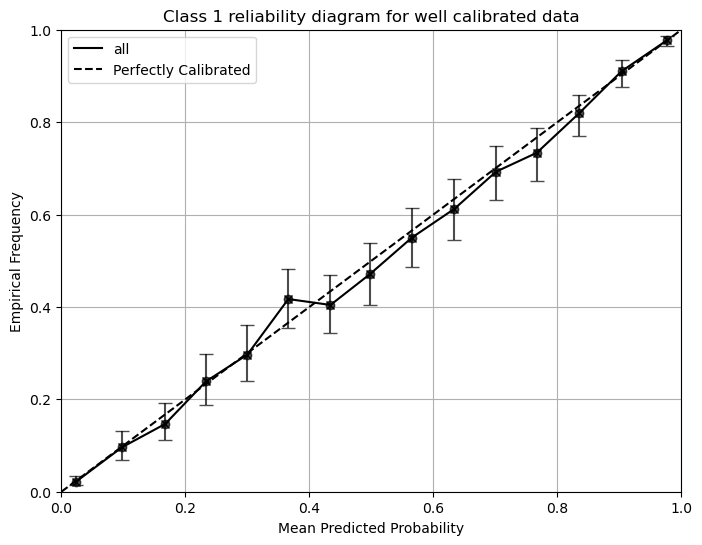

In [14]:
### Create and plot the class 1 well calibrated data
reliability,confindence,bin_edges,bin_counts = reliability_diagram(wellcal_dataloader.labels, wellcal_dataloader.probs, num_bins=15,class_to_plot=1) 
# Plot the reliability diagram
plot_reliability_diagram(reliability,confindence,bin_counts,error_bar=True,title='Class 1 reliability diagram for well calibrated data')


Class-by-class reliability diagram reveal more information about the model's calibbration. The top-class reliability diagram could be misleading as it could shows reasonable calibration for the top-class, but the model could be overconfident for the other classes. We can demonstrate in the following example.

In [40]:
### We will artificially drop the prevalence of class 1
# The top-class reliability diagram will still look good
# But the class-1 reliability diagram will be very bad
from calzone.utils import softmax_to_logits
from scipy.special import softmax
import numpy as np

test_dataloader = data_loader(data_path="../../../example_data/simulated_welldata.csv")
class_1_index = (test_dataloader.labels==1)

# We will drop 50% of class 1 samples
class_1_samples = np.where(class_1_index)[0]
drop_indices = np.random.choice(class_1_samples, size=int(len(class_1_samples)/2), replace=False)

mask = np.ones(len(test_dataloader.labels), dtype=bool)
mask[drop_indices] = False

test_dataloader.labels = test_dataloader.labels[mask]
test_dataloader.probs = test_dataloader.probs[mask]
test_dataloader.data = test_dataloader.data[mask]


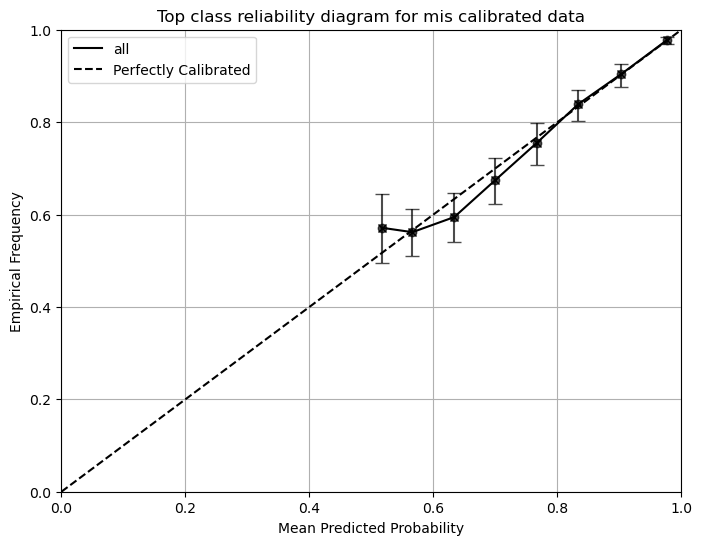

In [42]:
### Create and plot the top-class reliability diagram
reliability,confindence,bin_edges,bin_counts = reliability_diagram(test_dataloader.labels, test_dataloader.probs, num_bins=15,class_to_plot=None) 
plot_reliability_diagram(reliability,confindence,bin_counts,error_bar=True,title='Top class reliability diagram for mis calibrated data')


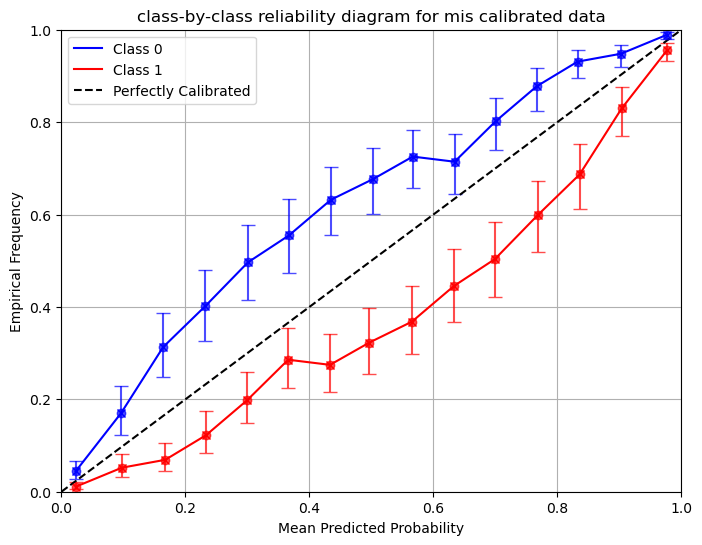

In [43]:
### Create and plot the class-by-class reliability diagram
reliability_0,confindence_0,bin_edges,bin_counts_0 = reliability_diagram(test_dataloader.labels, test_dataloader.probs, num_bins=15,class_to_plot=0) 
reliability_1,confindence_1,bin_edges,bin_counts_1 = reliability_diagram(test_dataloader.labels, test_dataloader.probs, num_bins=15,class_to_plot=1)
reliability = np.vstack((reliability_0,reliability_1))
confindence = np.vstack((confindence_0,confindence_1))
bin_counts = np.vstack((bin_counts_0,bin_counts_1))
plot_reliability_diagram(reliability,confindence,bin_counts,error_bar=True,title='class-by-class reliability diagram for mis calibrated data',custom_colors=['blue','red'])


The example shows us that the prevalence shift in the testing data could lead to mis-calibration in a posterior sense. The calzone provide a method to calibrate it. The prevalence is not related to the model and the model could still have the correct likelihood ratio. See more discussion in the prevalence adjustment section.